In [1]:
import numpy as np
import pandas as pd
import random
import time
import tqdm
import timeit
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
def Constant_operation(vector):
    return 1

In [3]:
def Sum_of_array(vector):
    return np.sum(vector)

In [4]:
def Product_of_array(vector):
    return np.prod(vector)

In [5]:
def Direct_polynomial_calculation(vector, x_val=1.5):
    x_values = []
    poly_output = 0
    for degree in range(len(vector)):
        if degree == 0:
            x_values.append(1)
        else:
            x_values.append(x_values[-1] * x_val)
        poly_output += x_values[-1] * vector[degree]
    return poly_output


In [6]:
def Horners_polynomial_calculation(vector, x_val=1.5):
    poly_output = 0
    for degree in list(range(len(vector)))[::-1]:
        if degree == len(vector) - 1:
            poly_output += vector[degree]
        else:
            poly_output += x_val * poly_output + vector[degree]
    return poly_output

In [7]:
def BubbleSort(vector):
    i = 0
    n = len(vector)
    while(i < n-1):
        j = n-1
        while(j>i):
            if(vector[j] < vector[j - 1]):
                vector[j - 1], vector[j] = vector[j], vector[j - 1]
            j-=1
        i+=1
    return vector

In [8]:
#partition function for quicksort
def double_partition(array, p, r):
    idx_left, idx_right = p, r
    middle_idx = random.randint(p, r)
    middle_value = array[middle_idx]
    while idx_left <= idx_right:
        while array[idx_left] < middle_value:
            idx_left += 1
        while array[idx_right] > middle_value:
            idx_right -= 1
            
        if idx_left <= idx_right:
            array[idx_left], array[idx_right] = array[idx_right], array[idx_left]
            idx_left, idx_right = idx_left + 1, idx_right -1
    return idx_left, idx_right

In [9]:
def Quicksort(vector, p=None, r=None):
    if p is None:
        p = 0
    if r is None:
        r = len(vector) - 1
    if p < r:
        q_left, q_right = double_partition(vector, p, r)
        Quicksort(vector, p, q_right)
        Quicksort(vector, q_left, r)
    return vector
    
    

In [10]:
def Timsort(vector):
    return sorted(vector)

In [11]:
def Matrixproduct(A,B):
    C=np.dot(A,B)
    return C

In [12]:
#generating random arrays
def generate_vectors(n):
    vectors = np.split(np.random.uniform(low=0, high=1000, size=n * 5), 5)
    return vectors

In [13]:
#generating random matrices for multiplication
def generate_matrices(n):
    matrices = np.split(np.random.uniform(low=0, high=1000, size=(2 * 5, n, n)), 5, axis=0)
    return matrices   

In [14]:
data=[]
#cycle for measuring time for different lengths
for n in tqdm.tqdm(range(1, 2001)):
    current_n = {"n": n}
    for operation in [
            "Constant_operation",
            "Sum_of_array",
            "Product_of_array",
            "Direct_polynomial_calculation",
            "Horners_polynomial_calculation",
            "BubbleSort",
            "Quicksort",
            "Timsort",
    ]:
            times = []
            for vector in generate_vectors(n):
                vector = vector.tolist()
                times.append(timeit.timeit(stmt=f"{operation}(vector)", globals=globals(), number=1))
            current_n[operation] = np.asarray(times).mean()
            
    times = []
    for matrix in generate_matrices(n):
        times.append(timeit.timeit(stmt="Matrixproduct(matrix[0],matrix[1])", globals=globals(), number=1))
        current_n["Matrixproduct"] = np.asarray(times).mean()
    data.append(current_n)
    

  5%|▌         | 108/2000 [00:00<00:14, 128.69it/s]/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
100%|██████████| 2000/2000 [33:00<00:00,  1.01it/s]  


In [15]:
df = pd.DataFrame(data)#store data in dataframe for more comfortable usage

In [16]:
df.to_csv('lab1_2.csv')#store data in file, to avoid accidentally loosing it

In [17]:
# df=pd.read_csv('lab1.csv') #if the data was lost read the file

In [18]:
df

,n,Constant_operation,Sum_of_array,Product_of_array,Direct_polynomial_calculation,Horners_polynomial_calculation,BubbleSort,Quicksort,Timsort,Matrixproduct
0,1,5.044000e-07,0.000014,0.000012,0.000002,0.000002,7.782000e-07,8.358000e-07,9.984000e-07,0.000007
1,2,3.806000e-07,0.000013,0.000011,0.000002,0.000003,1.544600e-06,1.128340e-05,9.398000e-07,0.000126
2,3,4.466000e-07,0.000013,0.000011,0.000003,0.000003,2.170400e-06,8.540800e-06,1.265400e-06,0.000015
3,4,5.068000e-07,0.000021,0.000025,0.000004,0.000004,3.213400e-06,1.068060e-05,1.539000e-06,0.000018
4,5,4.494000e-07,0.000022,0.000019,0.000004,0.000004,3.604400e-06,1.315480e-05,1.826200e-06,0.000046
...,...,...,...,...,...,...,...,...,...,...
1995,1996,5.559999e-07,0.000103,0.000090,0.000485,0.000366,3.718535e-01,5.423643e-03,1.943486e-04,0.096972
1996,1997,5.345999e-07,0.000137,0.000154,0.000449,0.000366,3.686544e-01,5.421332e-03,1.952138e-04,0.096708
1997,1998,5.550000e-07,0.000095,0.000155,0.000460,0.000356,3.735778e-01,5.459508e-03,1.941638e-04,0.097506
1998,1999,6.090000e-07,0.000114,0.000174,0.000412,0.000358,3.659427e-01,5.440748e-03,1.950768e-04,0.096880


In [19]:
rc('font', family='serif', serif='Times New Roman') #for Times New Roman fonts

# Constant operation

<Figure size 3000x2000 with 0 Axes>

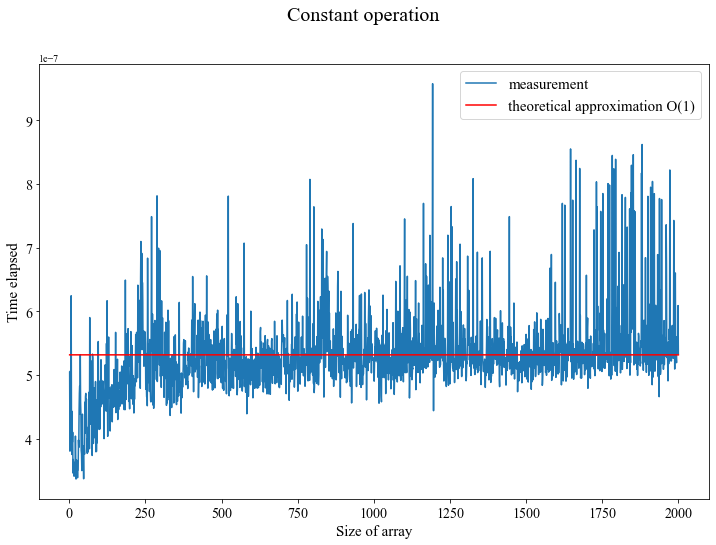

In [20]:
plt.figure(dpi=500)
plt.figure(figsize=(12, 8))
plt.plot(df['n'], df['Constant_operation'], label='measurement')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Time elapsed', fontsize=15)
plt.xlabel('Size of array', fontsize=15)
coef= np.polyfit(x=df['n'], y=df['Constant_operation'], deg=0)
theor = np.full_like(df['n'], coef[0], dtype=np.float64)
plt.plot(df['n'], theor, label='theoretical approximation O(1)', c='red')
plt.suptitle('Constant operation', fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(fname='Constant operation.png', format='png')

# Sum of array

<Figure size 3000x2000 with 0 Axes>

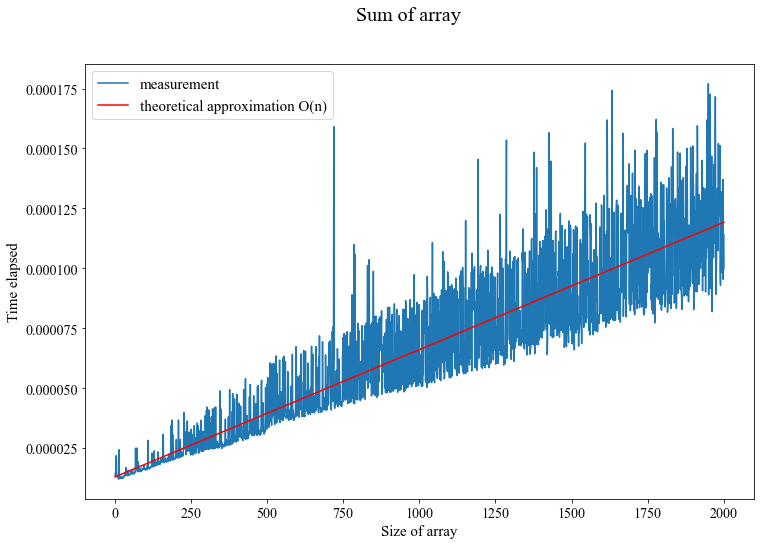

In [21]:
plt.figure(dpi=500)
plt.figure(figsize=(12, 8))
plt.plot(df['n'], df['Sum_of_array'], label='measurement')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Time elapsed', fontsize=15)
plt.xlabel('Size of array', fontsize=15)
coef= np.polyfit(x=df['n'], y=df['Sum_of_array'], deg=1)
theor = coef[0] * df['n'] + coef[1]
plt.plot(df['n'], theor, label='theoretical approximation O(n)', c='red')
plt.suptitle('Sum of array', fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(fname='Sum of array.png', format='png')

# Product of array

<Figure size 3000x2000 with 0 Axes>

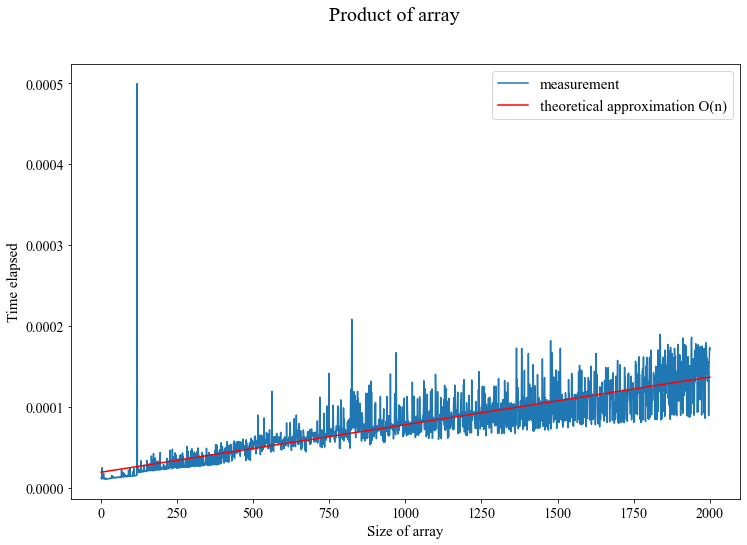

In [22]:
plt.figure(dpi=500)
plt.figure(figsize=(12, 8))
plt.plot(df['n'], df['Product_of_array'], label='measurement')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Time elapsed', fontsize=15)
plt.xlabel('Size of array', fontsize=15)
coef = np.polyfit(x=df['n'], y=df['Product_of_array'], deg=1)
theor = coef[0] * df['n'] + coef[1]
plt.plot(df['n'], theor, label='theoretical approximation O(n)', c='red')
plt.suptitle('Product of array', fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(fname='Product of array.png', format='png')


# Direct polynomial calculation

<Figure size 3000x2000 with 0 Axes>

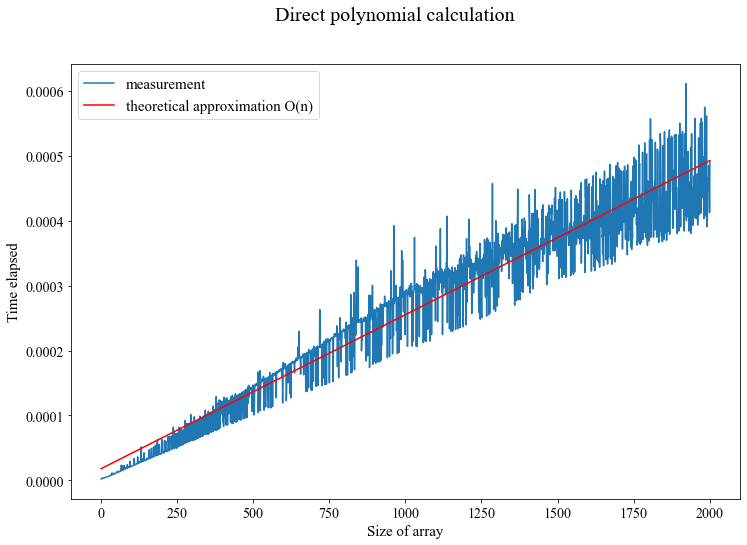

In [23]:
plt.figure(dpi=500)
plt.figure(figsize=(12, 8))
plt.plot(df['n'], df['Direct_polynomial_calculation'], label='measurement')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Time elapsed', fontsize=15)
plt.xlabel('Size of array', fontsize=15)
coef= np.polyfit(x=df['n'], y=df['Direct_polynomial_calculation'], deg=1)
theor = coef[0] * df['n'] + coef[1]
plt.plot(df['n'], theor, label='theoretical approximation O(n)', c='red')
plt.suptitle('Direct polynomial calculation', fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(fname='Direct polynomial calculation.png', format='png')

# Horner's polynomial calculation

<Figure size 3000x2000 with 0 Axes>

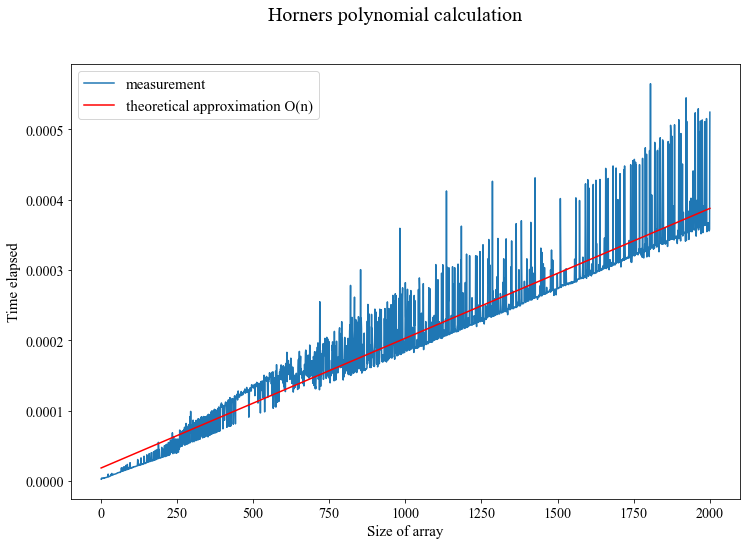

In [24]:
plt.figure(dpi=500)
plt.figure(figsize=(12, 8))
plt.plot(df['n'], df['Horners_polynomial_calculation'], label='measurement')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Time elapsed', fontsize=15)
plt.xlabel('Size of array', fontsize=15)
coef= np.polyfit(x=df['n'], y=df['Horners_polynomial_calculation'], deg=1)
theor = coef[0] * df['n'] + coef[1]
plt.plot(df['n'], theor, label='theoretical approximation O(n)', c='red')
plt.suptitle('Horners polynomial calculation', fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(fname='Horners polynomial calculation.png', format='png')

# Bubble Sort of an array

<Figure size 3000x2000 with 0 Axes>

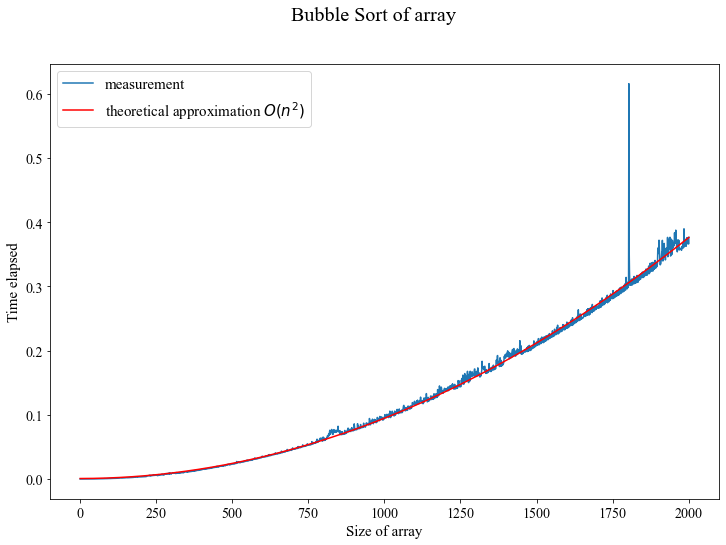

In [25]:
plt.figure(dpi=500)
plt.figure(figsize=(12, 8))
plt.plot(df['n'], df['BubbleSort'], label='measurement')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Time elapsed', fontsize=15)
plt.xlabel('Size of array', fontsize=15)
coef= np.polyfit(x=df['n'] ** 2, y=df['BubbleSort'], deg=1)
theor = coef[0] * df['n'] ** 2 + coef[1]
plt.plot(df['n'], theor, label=r'theoretical approximation $O(n^2)$', c='red')
plt.suptitle('Bubble Sort of array', fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(fname='Bubble Sort of array.png', format='png')

# Quicksort of array

<Figure size 3000x2000 with 0 Axes>

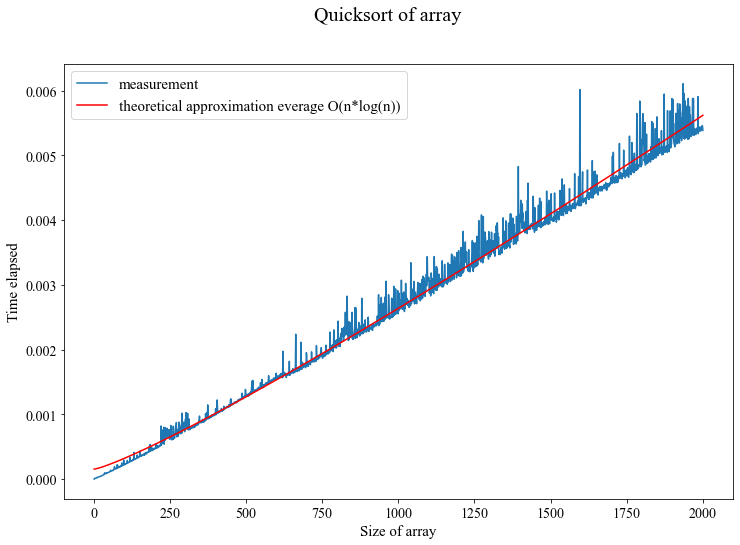

In [26]:
plt.figure(dpi=500)
plt.figure(figsize=(12, 8))
plt.plot(df['n'], df['Quicksort'], label='measurement')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Time elapsed', fontsize=15)
plt.xlabel('Size of array', fontsize=15)
coef= np.polyfit(x=np.log(df['n']) * df['n'], y=df['Quicksort'], deg=1)
theor = coef[0] * np.log(df['n']) * df['n'] + coef[1]
plt.plot(df['n'], theor, label='theoretical approximation everage O(n*log(n))', c='red')
plt.suptitle('Quicksort of array', fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(fname='Quicksort of array.png', format='png')

# Timsort of array

<Figure size 3000x2000 with 0 Axes>

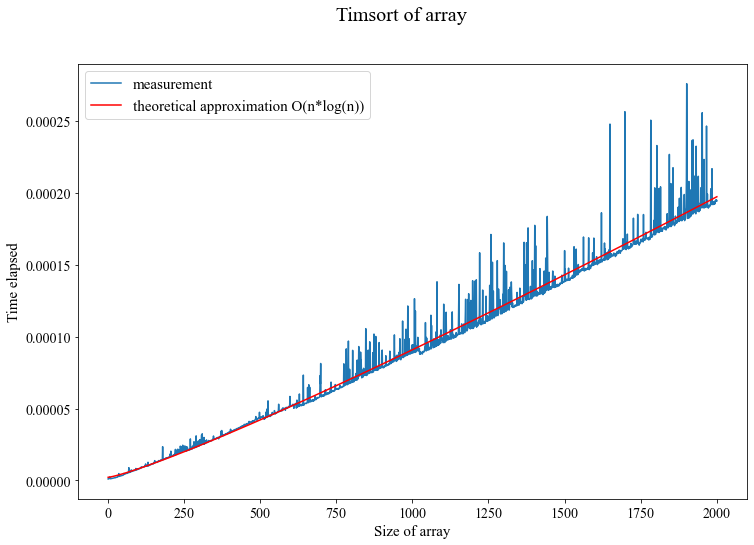

In [27]:
plt.figure(dpi=500)
plt.figure(figsize=(12, 8))
plt.plot(df['n'], df['Timsort'], label='measurement')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Time elapsed', fontsize=15)
plt.xlabel('Size of array', fontsize=15)
coef= np.polyfit(x=np.log(df['n']) * df['n'], y=df['Timsort'], deg=1)
theor = coef[0] * np.log(df['n']) * df['n'] + coef[1]
plt.plot(df['n'], theor, label='theoretical approximation O(n*log(n))', c='red')
plt.suptitle('Timsort of array', fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(fname='Timsort of array.png', format='png')

# Multiplication of square matrices

<Figure size 3000x2000 with 0 Axes>

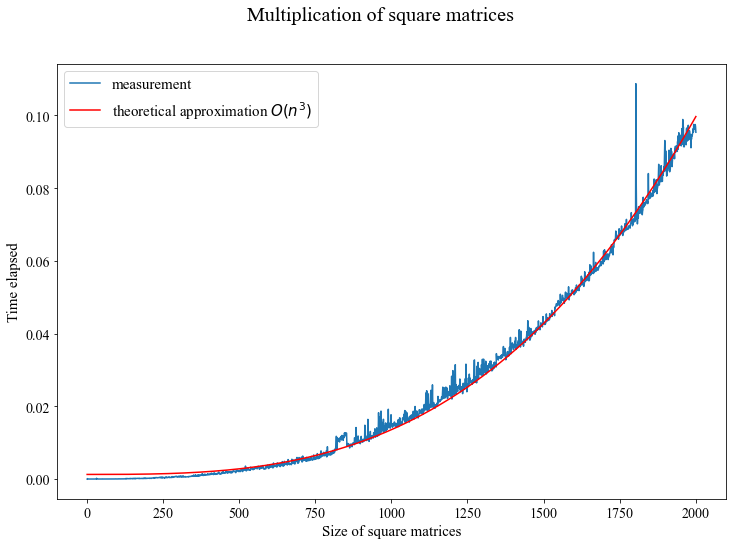

In [28]:
plt.figure(dpi=500)
plt.figure(figsize=(12, 8))
plt.plot(df['n'], df['Matrixproduct'], label='measurement')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Time elapsed', fontsize=15)
plt.xlabel('Size of square matrices', fontsize=15)
coef= np.polyfit(x=df['n'] ** 3, y=df['Matrixproduct'], deg=1)
theor = coef[0] * df['n'] ** 3 + coef[1]
plt.plot(df['n'], theor, label=r'theoretical approximation $O(n^3)$', c='red')
plt.suptitle('Multiplication of square matrices', fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.savefig(fname='Multiplication of square matrices.png', format='png')